In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [95]:
# read excel file
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='phosphor_model')
df = df[list(df.columns)[1:-6] + ['cd/A']]
print(df.shape)
df.head()

(120, 32)


homo_1    t1  lumo_2  homo_2  t2  lumo_3  homo_3  t3  lumo4  homo4  ...   \
0     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
1     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
2     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
3     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
4     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    

   thick_etl  lumo5  homo5  t5  lumo6  homo6  t6  wf_1    t7  cd/A  
0         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0   5.0  
1         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0   4.0  
2         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0   9.0  
3         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0  12.0  
4         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0   8.0  

[5 rows x 32 columns]

In [96]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0]

#drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(119, 32)


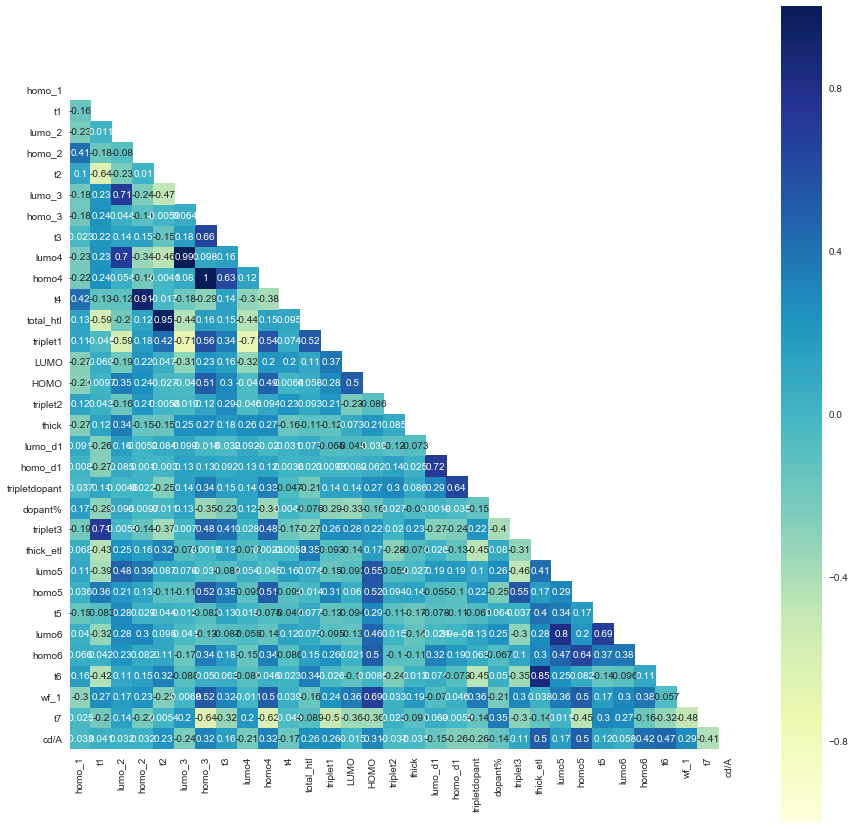

List the features in descending order of their correlation with cd/A:

thick_etl:   0.4971657384796494
homo5:   0.4951697143623201
t6:   0.4672285667728437
homo6:   0.4210555352690334
t7:   -0.41251899083889026
homo4:   0.324476102387787
homo_3:   0.3185892185451264
HOMO:   0.3114530734634466
wf_1:   0.28619530165458734
homo_d1:   -0.2638271525101858
tripletdopant:   -0.2621879579171176
triplet1:   0.2601181122179373
total_htl:   0.257551327804008
lumo_3:   -0.24012353905604425
t2:   0.2260693108139469
lumo4:   -0.21256311486526797
lumo5:   0.17225788122686647
t4:   -0.16933942716066844
t3:   0.1571108515601028
lumo_d1:   -0.15374348107999827
dopant%:   -0.14083737384547435
t5:   0.1218603047699117
triplet3:   0.10733252127282251
lumo6:   0.057956143025272425
t1:   0.04089710951275109
triplet2:   -0.036620097251408364
homo_1:   -0.032719759740205474
lumo_2:   0.032276586296087144
homo_2:   0.03200359914448516
thick:   -0.030670869146474933
LUMO:   -0.01452043243282054


In [97]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [100]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(119, 31)


homo_1    t1  lumo_2  homo_2  t2  lumo_3  homo_3  t3  lumo4  homo4  ...   \
0     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
1     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
2     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
3     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    
4     5.2  25.0     3.3     5.2   0     3.3     5.2   0    3.3    5.2  ...    

   triplet3  thick_etl  lumo5  homo5  t5  lumo6  homo6  t6  wf_1    t7  
0       2.6         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0  
1       2.6         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0  
2       2.6         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0  
3       2.6         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0  
4       2.6         35    2.8    6.2   0    2.8    6.2  35   2.8  10.0  

[5 rows x 31 columns]

In [67]:
y.head()

cd/A
0   5.0
1   4.0
2   9.0
3  12.0
4   8.0

In [101]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [102]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

# find best scored 5 features
select_feature = SelectKBest(f_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'scores', 'names'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        scores              names
0       homo5               28.016489996454343
1       thick_etl           24.447520926926607
2       t6                  23.618628097249537
3       t7                  21.87839633405418
4       homo_d1             13.653450217976408
5       homo4               12.795978966986524
6       homo_3              12.166328924677781
7       homo6               10.16806383422539
8       triplet1            9.330081321083451
9       tripletdopant       7.261349405647782
10      lumo_3              6.80382946377219
11      total_htl           6.427273842014637
12      lumo_d1             6.02655277965131
13      t2                  5.734830080858139
14      wf_1                5.588063969194578
15      lumo4               5.089151943939636
16      HOMO                3.7651532167397903
17      t4                  3.694859796951139
18      triplet3            3.0265536158837585
19      dopant%             2.203835739145871
20      lumo_2              1.6729970250

In [103]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# find best scored 5 features
select_feature = SelectKBest(mutual_info_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'scores', 'names'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        scores              names
0       homo4               0.29343566504435836
1       t7                  0.2728604061977007
2       triplet3            0.2565773218960461
3       homo_3              0.25161583825047096
4       lumo5               0.24982424744831944
5       homo5               0.2357701180565952
6       t2                  0.2348962812377584
7       homo6               0.19741869487291375
8       thick               0.18662362467143367
9       triplet1            0.16805530316254158
10      total_htl           0.16577667596883394
11      lumo_3              0.1607058691022627
12      thick_etl           0.1549166400869808
13      wf_1                0.14187200672318712
14      LUMO                0.1379048285301634
15      lumo6               0.1326962628860242
16      lumo_2              0.12731384342060448
17      lumo4               0.11980445155169606
18      tripletdopant       0.11396328041484627
19      t1                  0.10817199498968844
20      HOMO  

In [104]:
print(names)

('homo4', 't7', 'triplet3', 'homo_3', 'lumo5', 'homo5', 't2', 'homo6', 'thick', 'triplet1', 'total_htl', 'lumo_3', 'thick_etl', 'wf_1', 'LUMO', 'lumo6', 'lumo_2', 'lumo4', 'tripletdopant', 't1', 'HOMO', 'triplet2', 't6', 'homo_1', 'homo_2', 'homo_d1', 't3', 'dopant%', 'lumo_d1', 't5', 't4')


In [106]:
from sklearn.ensemble import RandomForestRegressor

X = df[['homo4'] + ['t7'] +['triplet3']+ ['homo_3'] +['lumo5'] + ['homo5'] + ['t2'] + ['homo6'] + ['thick'] + 
      ['triplet1'] +['total_htl'] + ['lumo_3'] + ['thick_etl'] + ['wf_1'] + ['LUMO'] + ['lumo6']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.536025793544
MS Error:  116.372694496


In [107]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=8, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ 0.69360767  0.45200073  0.20506936  0.34166548  0.59729558  0.74172574
  0.48111183  0.25100589]
mean score:  0.470435284108


        column              importance
0       triplet3            0.24901100889181751
1       t7                  0.16855252514400146
2       thick_etl           0.12381353935681147
3       LUMO                0.10490875624058629
4       thick               0.08024018615904736
5       total_htl           0.08016047276843617
6       lumo5               0.04964228431971944
7       t2                  0.04057933840376832
8       homo6               0.03833851590565033
9       lumo6               0.025927468957993492
10      homo_3              0.011568592350559017
11      homo4               0.009802264962023157
12      triplet1            0.0063490972807964865
13      homo5               0.004366346470490873
14      wf_1                0.0035961564975046877
15      lumo_3              0.003143446290793962


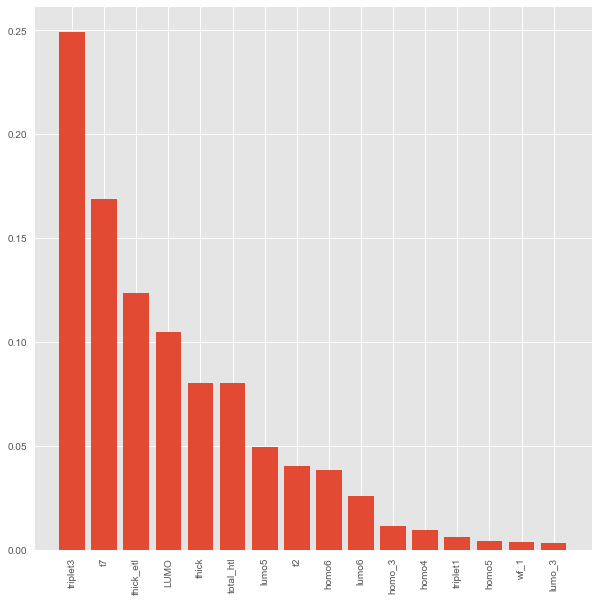

In [108]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

x = np.arange(16)
plt.bar(x, importance)
plt.xticks(x, names, rotation=90);

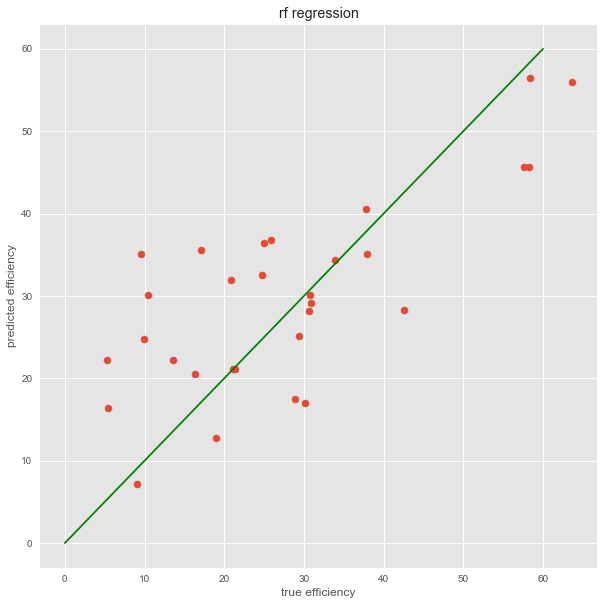

In [109]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' rf regression ')
plt.show()

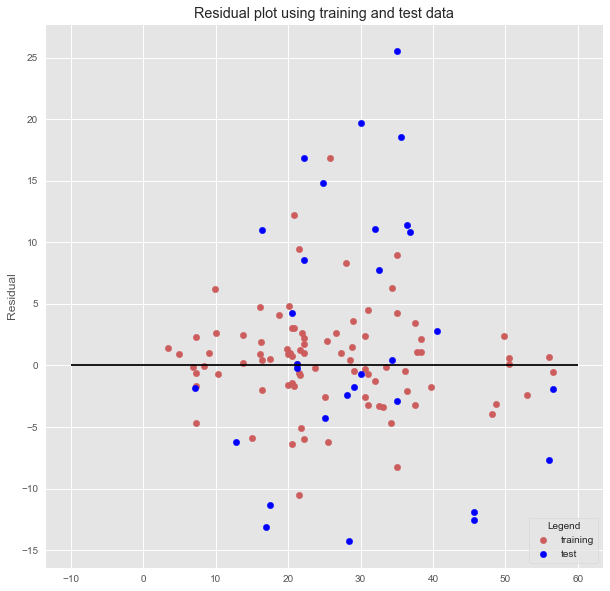

In [110]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train.values.ravel())
y_predictions = regressor.predict(X_test_scaled)


scores = cross_val_score(regressor, X_train_scaled, y_train.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

# Check how our model is doing
print('R-squared: ', regressor.score(X_test_scaled, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores:  [ 0.24703293  0.4756468   0.30748651  0.53777824  0.13878556 -1.18662278
  0.67375455 -0.08930994]
mean score:  0.138068982549
R-squared:  0.366117207997
MS Error:  158.988684012
